In [ ]:
import kagglehub
jessemostipak_hotel_booking_demand_path = kagglehub.dataset_download('jessemostipak/hotel-booking-demand')

print('Data source import complete.')


100%|██████████| 1.25M/1.25M [00:00<00:00, 1.75MB/s]

Extracting files...
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False)

,0
company,94.306893
agent,13.686238
country,0.408744
children,0.003350
arrival_date_month,0.000000
arrival_date_week_number,0.000000
hotel,0.000000
is_canceled,0.000000
stays_in_weekend_nights,0.000000
arrival_date_day_of_month,0.000000


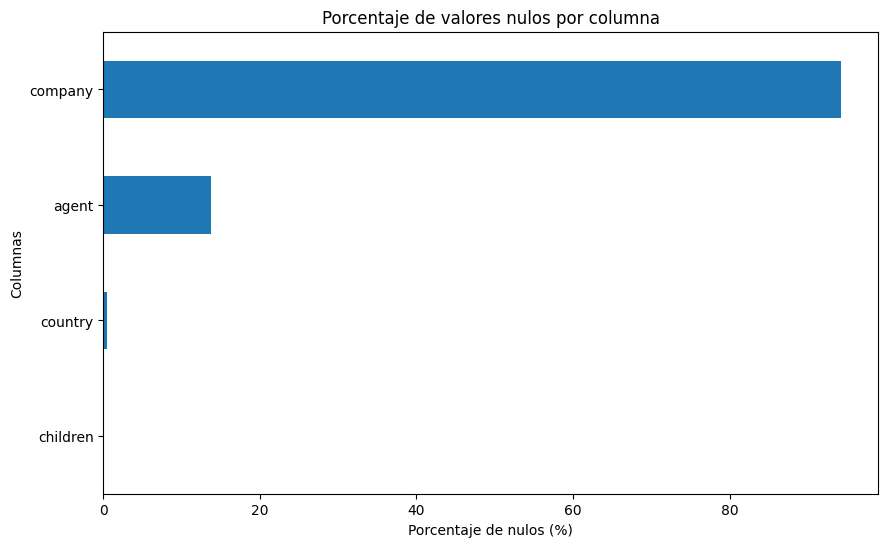

In [ ]:
import matplotlib.pyplot as plt


null_percent = df.isnull().mean() * 100
null_percent[null_percent > 0].sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de nulos (%)')
plt.ylabel('Columnas')
plt.show()

In [ ]:
df = df.drop_duplicates()

In [ ]:
most_common_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_common_country)

In [ ]:
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

In [ ]:
df['children'] = df['children'].fillna(0)

In [ ]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False)

,0
hotel,0.0
is_canceled,0.0
lead_time,0.0
arrival_date_year,0.0
arrival_date_month,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_weekend_nights,0.0
stays_in_week_nights,0.0
adults,0.0


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  float64       
 11  babies

In [ ]:
df['meal'] = df['meal'].replace('Undefined', 'Not Specified')
df['market_segment'] = df['market_segment'].replace('Undefined', 'Not Specified')
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'Not Specified')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape[0]

87396